# Youtube Video Analysis Using Different Data Visualization Techniques

### 1.1 Introduction 
There are millions of videos being uploaded by users of YouTube from different parts of the world. In addition to this, there is an addition of text information and tags along with these videos. Taking a look at some of the videos on YouTube, we understand that most of the uploads are from Entertainment category where they have many subscribers. 

Since there are many videos being uploaded during different times of the year, it's a good idea to consider those videos and add numerous plots. With the aid of data visualization, it is possible to analyze the trends and understand the times when large number of videos are being uploaded respectively. 

Hence, we would be working with different data visualization techniques to understand the data and get insights from it. We would be analyzing the data with the help of Californian data. Data visualization and analysis would be done in the project to ensure that insights are created and more value is added to the data at hand. It is important to import libraries for data visualization. Therefore, we would be first importing the libraries in the below cells and perform data analysis with the help of them. 

### 1.2 Data Source 
The data is taken from Kaggle - a platform for downloading data from different companies and a knowledge base for understanding machine learning and data science. Below is the link to the website where the data was downloaded. 

https://www.kaggle.com/datasnaek/youtube-new

### 1.3 Note
From the source, only the Californian data was taken. There is a lot of data available from different regions but I've just taken the Californian data to just see a trend only in California. 

## Table of Contents 
________________________________________________________________________________________________________________
#### 1. Youtube Video Analysis Using Different Data Visualization Techniques

&ensp;&ensp;&ensp;1.1 Introduction

&ensp;&ensp;&ensp;1.2 Data Source 

&ensp;&ensp;&ensp;1.3 Note 

#### 2. Reading the data 
#### 3. Countplots 

&ensp;&ensp;&ensp;3.1 Countplot of Different Category IDs

&ensp;&ensp;&ensp;3.2 Countplot of Different Categories

&ensp;&ensp;&ensp;3.3 Countplot of Comments Disabled

&ensp;&ensp;&ensp;3.4 Countplot of Ratings Disabled

&ensp;&ensp;&ensp;3.5 Countplot of Videos Error or Removed 

&ensp;&ensp;&ensp;3.6(a) Countplot of Trending Month 

&ensp;&ensp;&ensp;3.6(b) Countplot of Trending Year 

&ensp;&ensp;&ensp;3.7 Countplot of Comments Disabled Videos 

&ensp;&ensp;&ensp;3.8 Countplot of Ratings Disabled Videos 

&ensp;&ensp;&ensp;3.9 Countplot of Publishing Months 

#### 4. Groupby

&ensp;&ensp;&ensp;4.1 Grouping Average Views Based on Category 

&ensp;&ensp;&ensp;4.2 Grouping Likes Based on Categories

&ensp;&ensp;&ensp;4.3 Grouping Comments Based on Categories

&ensp;&ensp;&ensp;4.4 Grouping Channels Based on Channel Title 

#### 5. Scatterplot

&ensp;&ensp;&ensp;5.1 Scatterplot of Title Length Vs Views 

&ensp;&ensp;&ensp;5.2 Scatterplot of Title Length Vs Likes 

&ensp;&ensp;&ensp;5.3 Scatterplot of Likes Vs Views 

&ensp;&ensp;&ensp;5.4 Scatterplot of Views and Description Length 

&ensp;&ensp;&ensp;5.5 Scatterplot of Likes Vs Comments Count 

&ensp;&ensp;&ensp;5.6 Scatterplot of Likes Vs Dislikes 

&ensp;&ensp;&ensp;5.7 Regplot of Likes Vs Comments Count 

#### 6. Heatmap

&ensp;&ensp;&ensp;6.1 Heatmap of Correlation Matrix 

#### 7. Conclusion 
________________________________________________________________________________________________________________
## 1. Importing Useful Libraries


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import json
sns.set_palette('Dark2')
import warnings
warnings.filterwarnings('ignore')

## 2. Reading the data

We would be first reading the data. The data contains both the '.csv' file and also the '.json' file respectively. Since the information is stored in both the csv and json formats, we'll have to find a link between the 2 files and understand them so that we would be able to map the information to particular columns and rows in a dataframe in our '.csv' files respectively. 

In [8]:
df = pd.read_csv('D:\PORTFOLIO\Youtube-Video-Analysis-main\CAvideos.csv')
open_file = open('D:\PORTFOLIO\Youtube-Video-Analysis-main\CA_category_id.json')
df_category_json = json.load(open_file)

Let us look at the format of the '.json' file so that we would be able to take appropriate steps based on the data.

In [9]:
print('The type of the json file is: {}'.format(type(df_category_json)))

The type of the json file is: <class 'dict'>


Since the '.json' files are dictionary files, the format in which the data is stored is in key-value pairs. In order to retrieve values from a dictionary, a key must be given so that the value that is associated with it could be extracted. 

In [10]:
print("We would be reading a few values present in the json dictionary file")
print("\n")
df_category_json['kind']

We would be reading a few values present in the json dictionary file




'youtube#videoCategoryListResponse'

Indexing a dictionary that is complex could be tedious. Since in our data there are multiple keys along with values that are stored in list format, a step-by-step must be followed to extract the useful information from the '.json' file respectively. 

In [11]:
type(df_category_json['items'])

list

Let us now look at the length of the '.json' file and the number of elements that are present. The steps that are taken in order to extract useful information are shown below. 

In [12]:
print("The total number of items that are present in the json file are {}".format(len(df_category_json['items'])))

The total number of items that are present in the json file are 31


In our '.csv' files, we are only given the Category ID without any information about the name of the category. The actual names along with categories are given in the '.json' files. We would have to find a connection between the '.json' file and the '.csv' file in order to extract useful information and apply all the category information respectively. 

In [13]:
print("The total number of unique category IDs present in our data are: {}".format(df['category_id'].nunique()))

The total number of unique category IDs present in our data are: 17


## 3. Countplots

Countplots are a great way to get an understanding of the total number of features and their number. For instance, a particular feature in our data could be taken and the count of the categorical values are represented using a barplot. It is a great way to understand the count of different categories of features respectively. We would be making use of the countplot and get an understanding of features present in our data. 

### 3.1 Countplot of Different Category IDs

Looking at the countplot below, we see that the category_ID 24 is the highest in terms of count. There are other values (IDs) present but those do not make sense as we don't know much about the category though we only know the category ID respectively. Therefore, we'll be mapping the actual names of the categories from the '.json' files to the category IDs from the dataframe found in the '.csv' file so that we get can a good understanding of the count of different categories. 

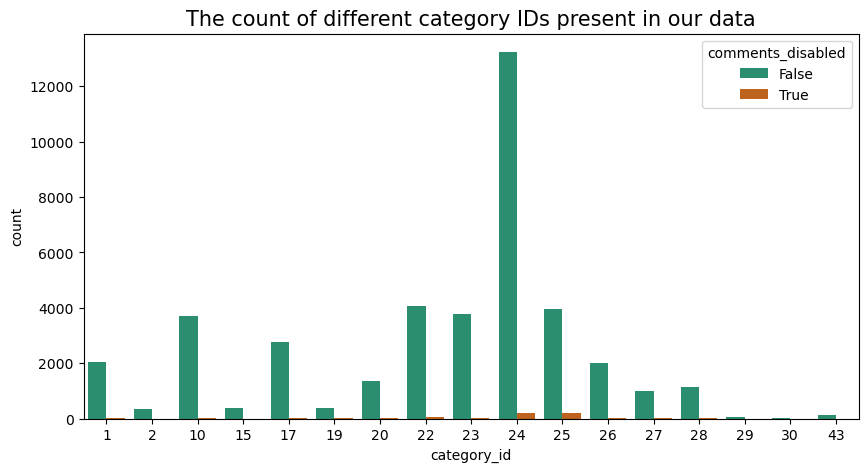

In [14]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'category_id', hue = 'comments_disabled', data = df)
plt.title("The count of different category IDs present in our data", fontsize = 15)
plt.show()

Taking a look at the description, we see that there are values that are null. Since the total number of null values are quite low compared to the overall values that we have, it would be better to just remove those values so that we get a good understanding of the data that we are working and analysing respectively. 

In [15]:
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64

We see that we have 1296 missing values in the description. 

In [16]:
print("The number of null values present in the description column: {}".format(df.isnull().sum()['description']))

The number of null values present in the description column: 1296


We would be looking at the length of the dataframe and check the total number of values. 

In [17]:
print("The length of the dataframe is: {}".format(len(df)))

The length of the dataframe is: 40881


Calculating the percentange of values, we would store it in a variable.

In [18]:
percentage_of_missing_values = df.isnull().sum()['description']/len(df) * 100

The percentage of mssing values is about 3.17% which is quite low and therefore, could be discarded.

In [19]:
print("The percentage of missing values in the data are {}%".format(np.round(percentage_of_missing_values, 2)))

The percentage of missing values in the data are 3.17%


We would drop the values that are null so that we could work with data better.

In [20]:
df.dropna(inplace = True)

Removing the rows that contain null values, we get the output below along with the description respectively. 

In [21]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

Looking at the head of the data, there are a few columns that could be deleted such as video_id and thumbnail_link as they don't make a good impact in our machine learning data analysis respectively.

In [22]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


We would be creating an empty dictionary and we are going to be using that to get the predictions respectively. 

In [23]:
titles_dict = dict()

Taking at a look at the titles dictionary, we see that it is empty as we have created an empty dictionary for the time being. 

In [24]:
titles_dict

{}

We would be creating a dictionary and understanding some of the useful information that is associated with it. Later, we would take those values together and then add them to different categories so that we get the best results. 

In [25]:
for i in range(len(df_category_json['items'])):
    print(df_category_json['items'][i]['id'])
    print(df_category_json['items'][i]['snippet']['title'])
    id_number = int(df_category_json['items'][i]['id'])
    category = df_category_json['items'][i]['snippet']['title']
    titles_dict[id_number] = category
               

1
Film & Animation
2
Autos & Vehicles
10
Music
15
Pets & Animals
17
Sports
18
Short Movies
19
Travel & Events
20
Gaming
21
Videoblogging
22
People & Blogs
23
Comedy
24
Entertainment
25
News & Politics
26
Howto & Style
27
Education
28
Science & Technology
30
Movies
31
Anime/Animation
32
Action/Adventure
33
Classics
34
Comedy
35
Documentary
36
Drama
37
Family
38
Foreign
39
Horror
40
Sci-Fi/Fantasy
41
Thriller
42
Shorts
43
Shows
44
Trailers


Let us know look at the different categories and their associated values present in them. We see different values for different categories and we would be mapping them together to ensure that best results are obtained. 

In [26]:
print(titles_dict)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


We would be mapping the titles dictionary to the category in the dataframe so that we get the actual values in the output.

In [27]:
df['category'] = df['category_id'].map(titles_dict)

Since the category ID is being created, it is now better to remove the category ID as those values are already present in our category column that we have just prepared and understood. 

In [28]:
df.drop('category_id', axis = 1, inplace = True)

In [29]:
df.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


We would drop the video id from the dataframe as it is not required. 

In [30]:
df.drop('video_id', axis = 1, inplace = True)

We also see that we cannot infer much about thumbnail link as there is not much information in the '.json' files as well. Therefore, we would be dropping that column just to get to know our data better.

In [31]:
df.drop('thumbnail_link', axis = 1, inplace = True)

We would be looking at the ratings columns and see that there are 2 values present in it. Therefore, it becomes easy for us to perform the analysis.

In [32]:
df['ratings_disabled'].unique()

array([False,  True])

Let us now look at the different unique values present in video_error_or_removed respectively. We see that there are 2 unique values present. 

In [33]:
df['video_error_or_removed'].unique()

array([False,  True])

New function is being created namely true_false_converter. This function is just used to return 1 for True values and 0 for the false values. This function is only used to convert the Boolean values to numerical values for interpretation. 

In [34]:
def true_false_converter(value):
    if value == True:
        return 1
    else:
        return 0

Applying the function to our data, we would be replacing the old columns with the news ones with just binary values respectively.

In [35]:
df['comments_disabled'] = df['comments_disabled'].apply(true_false_converter)
df['ratings_disabled'] = df['ratings_disabled'].apply(true_false_converter)
df['video_error_or_removed'] = df['video_error_or_removed'].apply(true_false_converter)

In [36]:
df.tail()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,0,0,0,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Entertainment
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,0,0,0,► Retrouvez vos programmes préférés : https://...,Entertainment
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,0,0,0,Find out more about Kingdom Hearts 3: https://...,Gaming
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,0,0,0,Peter Navarro isn’t talking so tough now. Ana ...,News & Politics
40880,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,2018-06-13T16:00:03.000Z,"吳宗憲|""吳姍儒""|""小明星大跟班""|""Sandy""|""Jacky wu""|""憲哥""|""中天...",107392,300,62,251,0,0,0,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...,Entertainment


We would take a look at different tags and understand them respectively. 

In [37]:
df['tags'][0]

'Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"'

In [38]:
df['tags'][1]

'plush|"bad unboxing"|"unboxing"|"fan mail"|"idubbbztv"|"idubbbztv2"|"things"|"best"|"packages"|"plushies"|"chontent chop"'

We see that we have a lot of values that are present for "Entertainment" followed by "News & Politics" respectively. In addition to this, we see that the least number of values that we have are in the category "Movies". 

### 3.2 Countplot of Different Categories

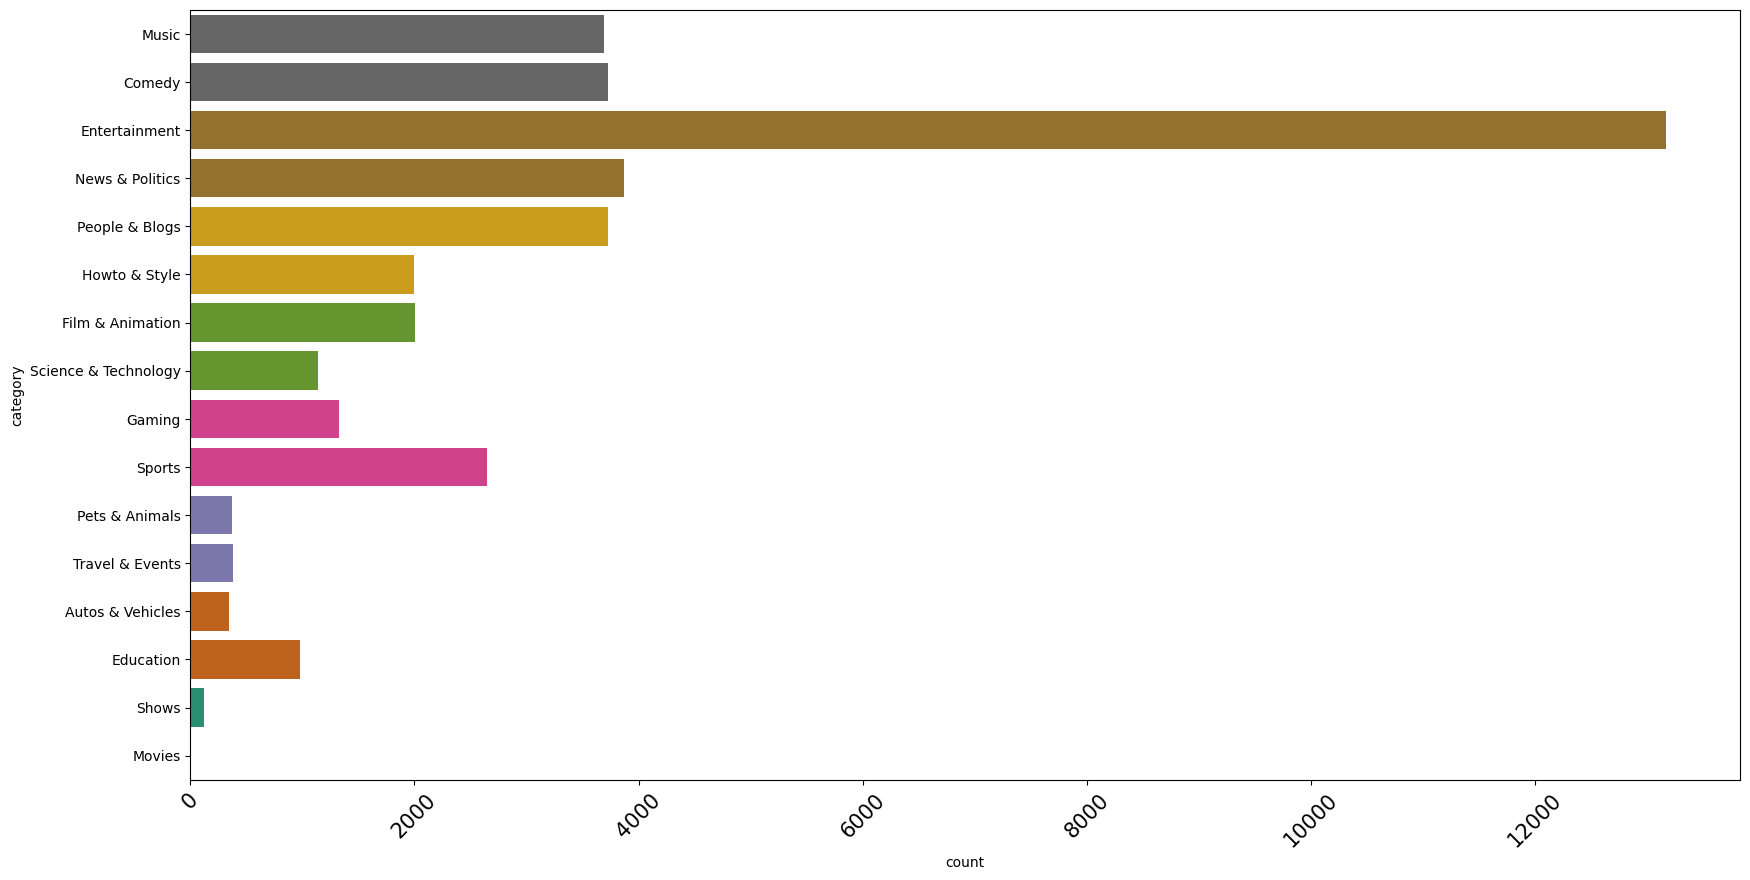

In [39]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45, fontsize = 15)
sns.countplot(df['category'], palette = 'Dark2_r')
plt.show()

Checking the type of data that we have, we see that they are of integer categories. 

In [40]:
type(df['comments_disabled'][0])

numpy.int64

Looking at the number of comments disabled, we have only 2 unique values respectively. 

In [41]:
df['comments_disabled'].unique()

array([0, 1], dtype=int64)

Looking at the shape of the data just to get to know the values respectively.

In [42]:
df.shape

(39585, 14)

There are different unique values that are present in channel_title. Since there are a lot of channel_title values, we cannot be taking those values and using the countplot respectively.

In [43]:
df['channel_title'].nunique()

4773

Looks like there are only a very few comments that are disabled while a lot of comments are enabled just by looking at the plots generated below. This is true in real-world as there are only a few videos where the comments are disabled. 

### 3.3 Countplot of Comments Disabled

<Axes: xlabel='comments_disabled', ylabel='count'>

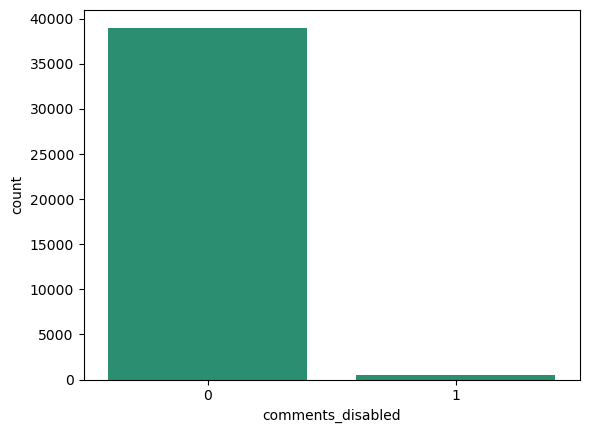

In [44]:
sns.countplot(x = 'comments_disabled', data = df)

### 3.4 Countplot of Ratings Disabled

<Axes: ylabel='count'>

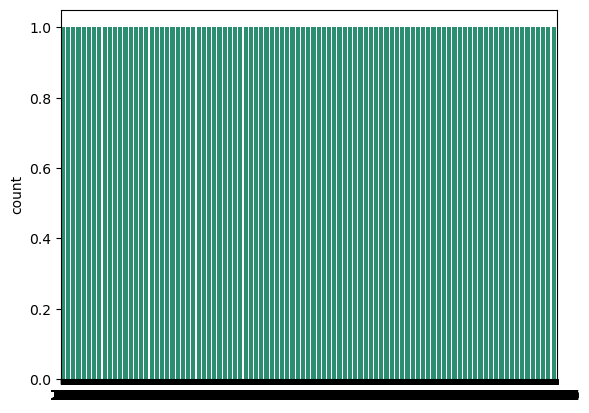

In [45]:
sns.countplot(df['ratings_disabled'])

We also see that there are just a very few videos which are disabled. Therefore, this is reflective of the real-world as there are only a few videos which could be removed respectively. 

### 3.5 Countplot of Videos Error or Removed

<Axes: ylabel='count'>

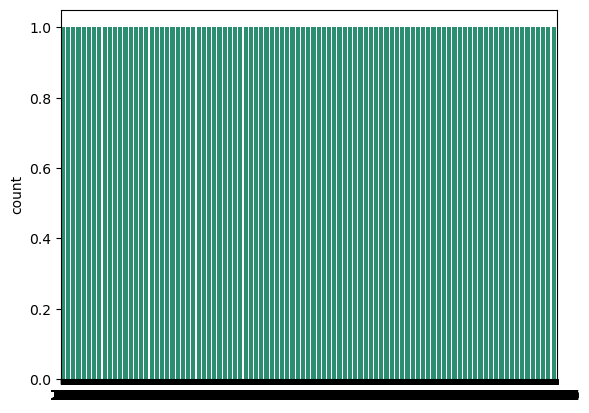

In [46]:
sns.countplot(df['video_error_or_removed'])

In our data, there are some videos who are either removed or there is error. Let us take a look at the videos of this category. 

In [47]:
print("The total number of videos which have been removed or there is error are {}".format(len(df[df['video_error_or_removed'] == 1])))

The total number of videos which have been removed or there is error are 27


Taking the average of different categories for likes, dislikes and comment counts, we would be getting the below table. Since it is difficult to interpret the results, it is better to plot the values just to get a sense of the data respectively.

In [51]:
# Group by 'category' and calculate the mean for the specified columns
result = df.groupby('category')[['views', 'likes', 'dislikes', 'comment_count']].mean()
# Reset the index to make 'category' a column again (optional)
result = result.reset_index()
# Display the result
print(result)

                category         views          likes     dislikes  \
0       Autos & Vehicles  5.676173e+05   13555.859195   566.508621   
1                 Comedy  9.891344e+05   52293.700671  1434.022282   
2              Education  5.370408e+05   21270.646640   803.415479   
3          Entertainment  1.027834e+06   29272.942914  1947.986412   
4       Film & Animation  1.459745e+06   38827.168916  1551.424288   
5                 Gaming  9.222066e+05   38750.436090  1830.503008   
6          Howto & Style  7.845609e+05   25600.145145   864.553053   
7                 Movies  2.853415e+06   42150.833333  2046.666667   
8                  Music  3.556905e+06  152354.803518  5971.520704   
9        News & Politics  4.045271e+05    8325.420889   813.498966   
10        People & Blogs  8.273183e+05   27217.688137  2495.093398   
11        Pets & Animals  6.384612e+05   23931.533875   501.363144   
12  Science & Technology  1.216360e+06   36757.263342  1545.007874   
13                 S

## 4. Groupby

Grouping the data based on certain set of features is useful especially for data visualization purposes and understanding. Since there could be features that are categorical, it is useful to group values based on the features and perform computations. There can be many computations performed such as finding the mean, median, more or sum of the values after grouping the data based on categories. 

### 4.1 Grouping Average Views Based on Category

After sorting and looking at the total number of views, we see that the average number of views are high for music videos compared to movies. In addition to this, we see that there are travel & events category that has the lowest average number of views respectively. 

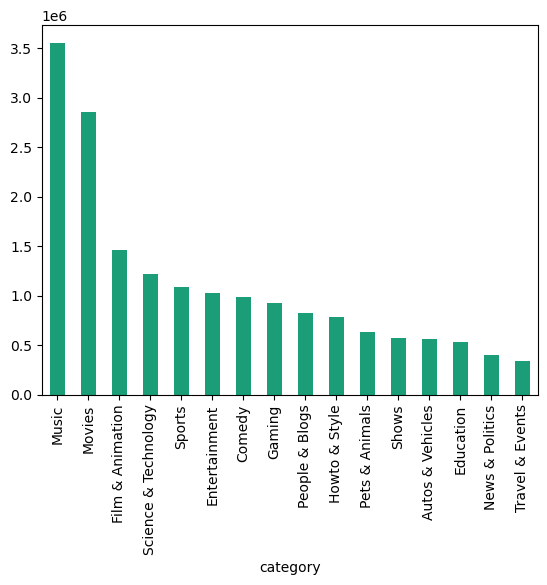

In [55]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df.groupby('category')['views'].mean().sort_values(ascending=False).plot.bar()

# Show the plot
plt.show()

### 4.2 Grouping Likes Based on Categories

Looking at likes on average, we see that music videos have the highest number of likes. There are other videos such as comedy and movies that don't receive as many likes as those of the videos that are musical. "News & Politics" and "Shows" category of videos do not receive as many likes as those of the other categories such as "Music" and "Comedy" respectively. 

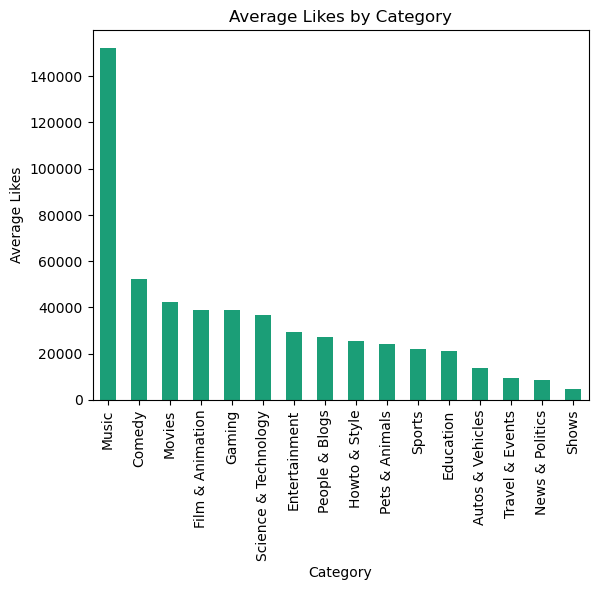

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df.groupby('category')['likes'].mean().sort_values(ascending=False).plot(kind='bar')

# Show the plot
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.title('Average Likes by Category')
plt.show()

### 4.3 Grouping Comments Based on Categories

Looking at the different categories, we see that the average comment count is the highest again for the music videos. However, the "shows" category does not contain a lot of values present in them. We see that a lot of values that are present are the "Music" videos and the lowest number of videos are "Shows" categories. In addition to this, we see that "Travel & Events" contain the second lowest average comments count respectively. 

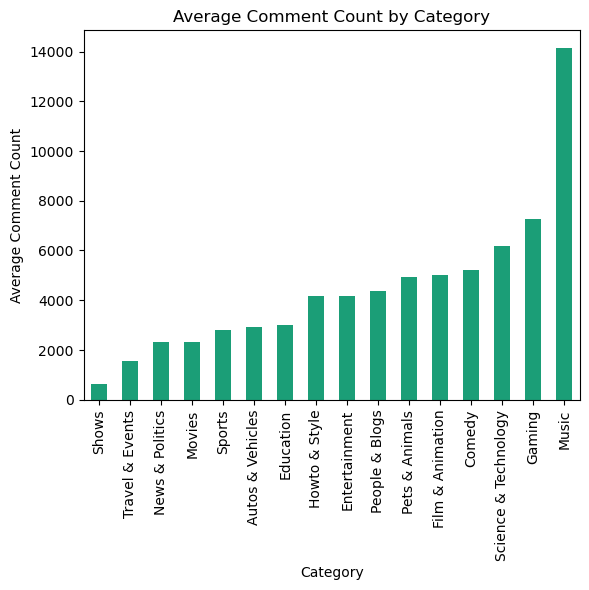

In [58]:
# Assuming df is your DataFrame
# Group by 'category', calculate the mean of 'comment_count', sort the values, and plot as a bar chart
df.groupby('category')['comment_count'].mean().sort_values().plot(kind='bar')

# Add labels and title for better visualization
plt.xlabel('Category')
plt.ylabel('Average Comment Count')
plt.title('Average Comment Count by Category')

# Show the plot
plt.show()


In [59]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,0,0,0,STill got a lot of packages. Probably will las...,Comedy
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,0,0,0,I know it's been a while since we did this sho...,Entertainment
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


### 4.4 Grouping Channels Based on Channel Title

Now it is time to understand the channel titles that are present in our data respectively. We see from the data that most of the channels are from SET India followed by MSNBC. Looking at the graph below, one can tell that there is not a significant difference between the frequently occurring channels in the data respectively.

<Axes: xlabel='channel_title', ylabel='count'>

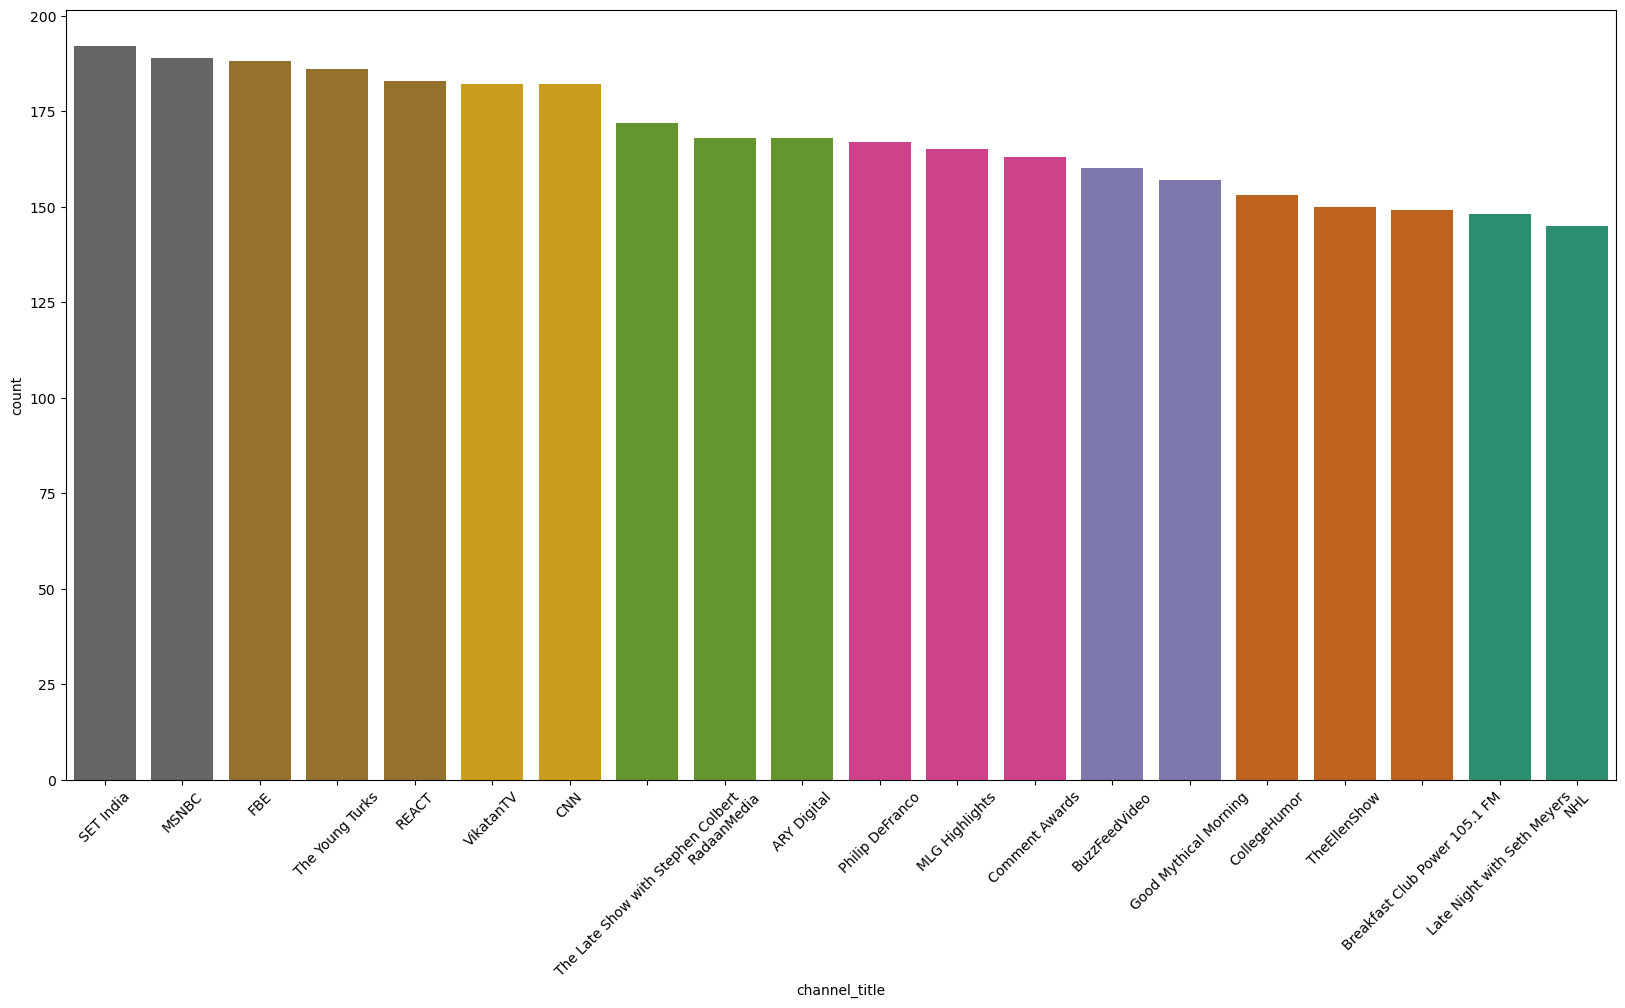

In [60]:
plt.figure(figsize = (20, 10))
plt.xticks(rotation = 45)
sns.barplot(x = df['channel_title'].value_counts()[: 20].index, y = df['channel_title'].value_counts()[: 20], palette = 'Dark2_r')

Looking at the channel titles that are present in the data. There are different shows that are included and different titles associated with them. 

In [61]:
df['channel_title']

0              EminemVEVO
1               iDubbbzTV
2            Rudy Mancuso
3                nigahiga
4              Ed Sheeran
               ...       
40876     Annoying Orange
40877    Elhiwar Ettounsi
40878      Kingdom Hearts
40879     The Young Turks
40880            我愛小明星大跟班
Name: channel_title, Length: 39585, dtype: object

In [96]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,0,0,0,STill got a lot of packages. Probably will las...,Comedy
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,0,0,0,I know it's been a while since we did this sho...,Entertainment
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In the data, the trending year mentioned is just a '17' or a '18' rather than mentioning the full details. When looking at the full details, we'll have to convert it into a form such as '2017' or '2018' so that it becomes easier for us to understand the data and implement it in different machine learning operations and data visualization. 

In [62]:
df['trending_date'][0][:2]

'17'

Using the apply function, the data is converted into the form that is quite useful for analysis so that one could get a good understanding of the trending year and the popularity of the videos respectively. 

In [63]:
df['trending_year'] = df['trending_date'].apply(lambda x: '20' + x[:2])

Extracting the trending day that is present in our data to understand and learn the working of it respectively. 

In [64]:
df['trending_day'] = df['trending_date'].apply(lambda x: x[3: 5])

In [65]:
df.head()

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending_year,trending_day
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,0,0,0,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017,14
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,0,0,0,STill got a lot of packages. Probably will las...,Comedy,2017,14
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,0,0,0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,2017,14
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,0,0,0,I know it's been a while since we did this sho...,Entertainment,2017,14
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,0,0,0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,2017,14


Let us now look at the trending month to ensure that we get the results right and use them for the data analysis and different data visualizations respectively. 

In [66]:
df['trending_month'] = df['trending_date'].apply(lambda x: x[6: 8])

In [67]:
df['trending_month'] 

0        11
1        11
2        11
3        11
4        11
         ..
40876    06
40877    06
40878    06
40879    06
40880    06
Name: trending_month, Length: 39585, dtype: object

### 3.6(a) Countplot of Trending Month

Now comes the time to apply the countplot and count the total number of videos that are present for different months that are trending. Looking at the data, we can say that there are quite a less number of videos that are trending on 'June' and 'November'. The highest trending month where the videos are trending are on months 'March' and 'May' respectively. 

<Axes: xlabel='count', ylabel='trending_month'>

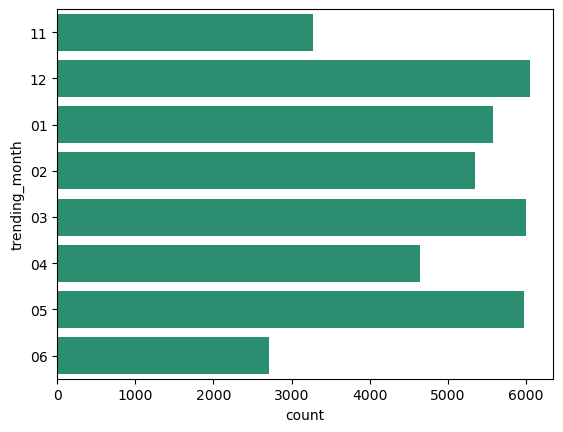

In [68]:
sns.countplot(df['trending_month'])

### 3.6(b) Countplot of Trending Year

We have just 2 years that are present in our data. Looking at the data, most of the videos are from 2018 while a few videos are from 2017. We can also infer that we can take more data from different years to get variability in the trends and the trending years respectively just with the help of visualization. 

<Axes: xlabel='count', ylabel='trending_year'>

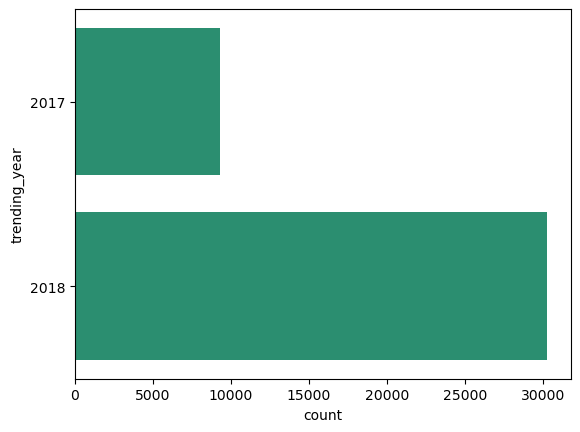

In [69]:
sns.countplot(df['trending_year'])

Let us also create new features that would ensure that those features are visualized, leading to better outputs respectively. We would create a new column such that we understand and ensure that length of the title are being created. 

In [70]:
df['title_length'] = df['title'].apply(lambda x: len(x))

## 5. Scatterplots

Scatterplots give a good idea about the spread of the data between two features. Suppose if there is a strong correlation between features, then we could find the correlation with the aid of scatterplots. If the values are negatively correlated, those values could be easily found out using scatterplots respectively. We are going to make use of scatterplots between different features and understand their correlation. 

### 5.1 Scatterplot of Title Length Vs Views

Taking a countplot between views and title length, one would be able to understand from the below visualization that most of the views were for the videos where the title length is about 40 - 60 words. In addition to this, we also see that as the title length keeps increasing, the number of views keeps slowly decreasing as can be seen from the below trend. Therefore, we were able to infer this by creating new features and understanding them fully. 

<Axes: xlabel='views', ylabel='title_length'>

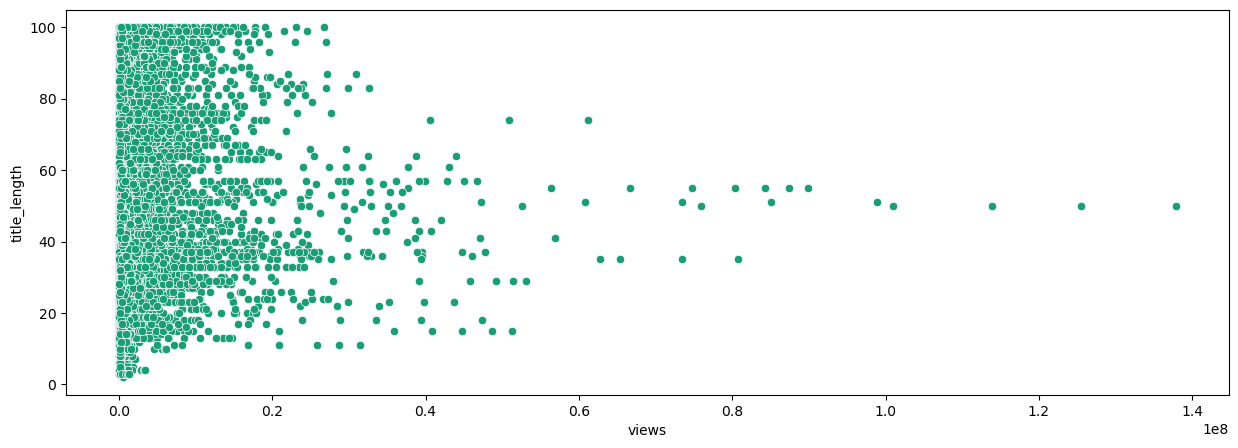

In [71]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'views', y = 'title_length', data = df)

### 5.2 Scatterplot of Title Length Vs Likes

We can also see a similar trend for likes vs views in our data. Highest number of views were for those videos where the title length was about 30 - 60 words as can be seen. 

<Axes: xlabel='likes', ylabel='title_length'>

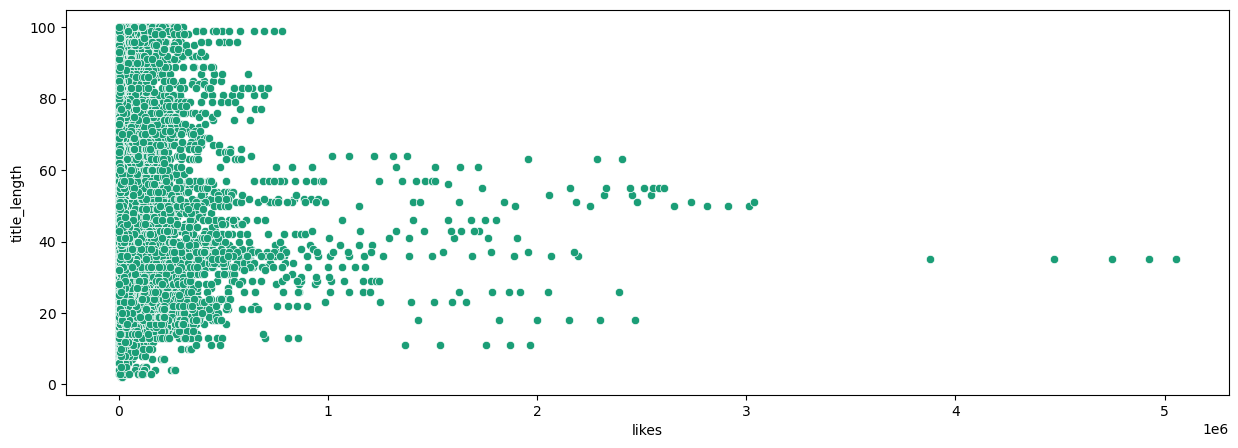

In [72]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'likes', y = 'title_length', data = df)

### 5.3 Scatterplot of Likes Vs Views 

Let us also explore if there is a relationship between likes and views. Looking at the below plot, we can safely say that there is a good relationship between likes and views. As the likes keep increasing, there is a possiblity for views to increase and vice-versa. 

<Axes: xlabel='likes', ylabel='views'>

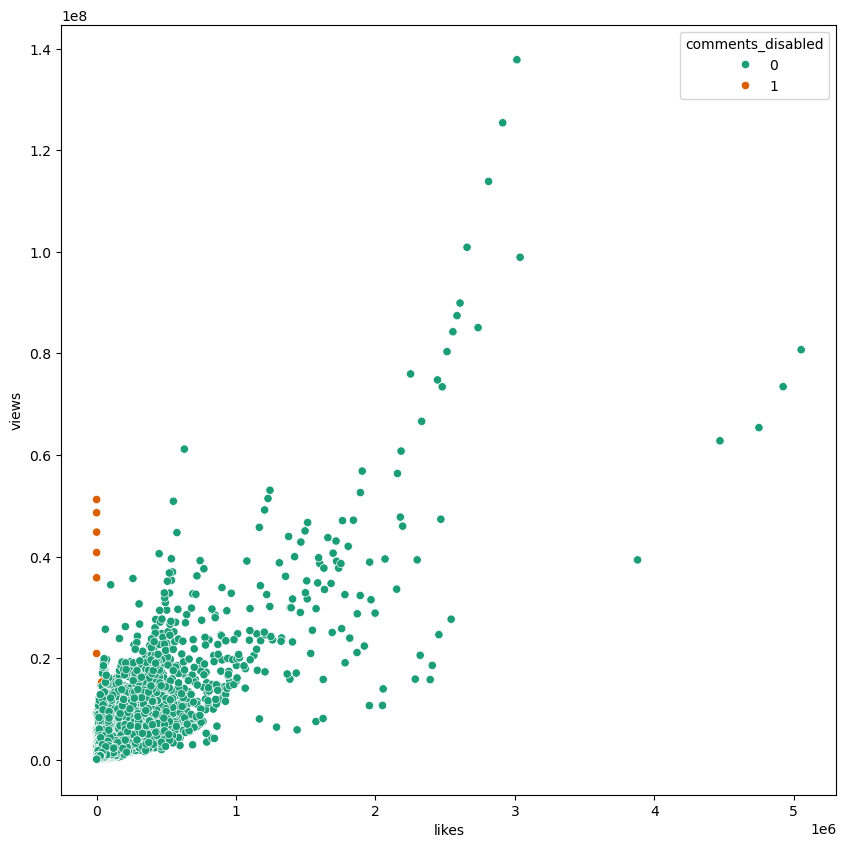

In [73]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'likes', y = 'views', hue = 'comments_disabled', data = df)

In [74]:
import datetime

In [75]:
datetime.datetime.strptime

<function datetime.strptime>

We would be applying the datetime library and apply it across a column so that we can treat those year, month and day as separate values respectively. 

In [76]:
df['publish_year'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').year)
df['publish_month'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').month)
df['publish_day'] = df['publish_time'].apply(lambda x: datetime.datetime.strptime(x[: 10], '%Y-%m-%d').day)

Since we have created useful information, we would just delete the columns that we no longer need.

In [77]:
df.drop(['trending_date', 'publish_time'], axis = 1, inplace = True)

### 3.7 Countplot of Comments Disabled Videos

Looking at different videos where the comments were disabled, we see that most of the comments were disabled for Entertainment type videos followed by News & Politics video category. The least amount of videos that were disabled were from Gaming and Autos & Vehicles respectively. 

<Axes: xlabel='count', ylabel='category'>

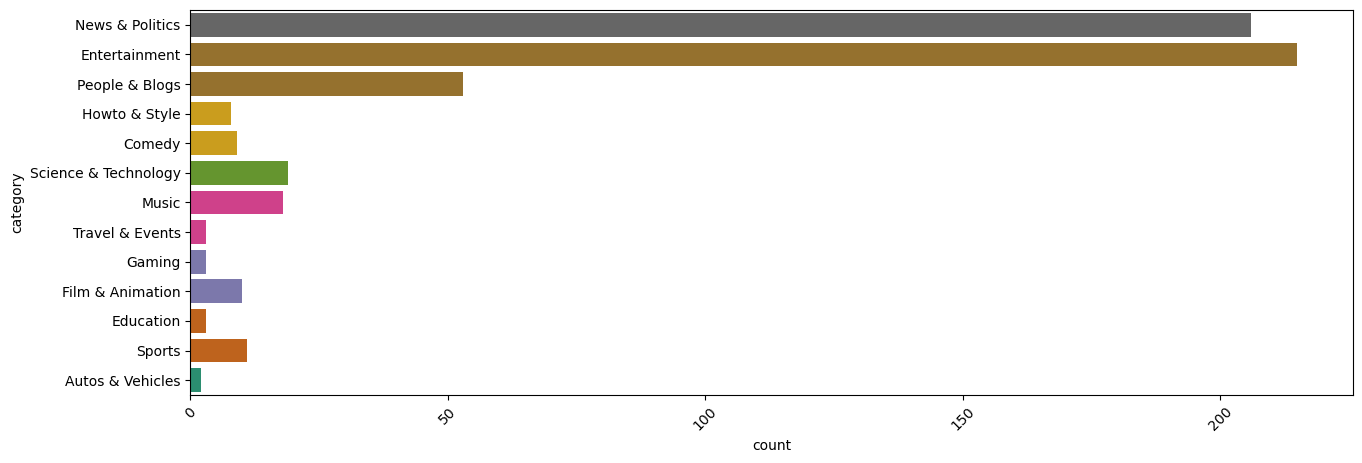

In [78]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 45)
sns.countplot(df[df['comments_disabled'] == 1]['category'], palette = 'Dark2_r')

### 3.8 Countplot of Ratings Disabled Videos

We would now consider the videos where the ratings were disabled. We see below that Entertainment category videos have the most ratings disabled. The second highest is News & Politics. The least category of videos where the ratings were disabled are from Gaming and Science & Technology respectively. 

<Axes: xlabel='count', ylabel='category'>

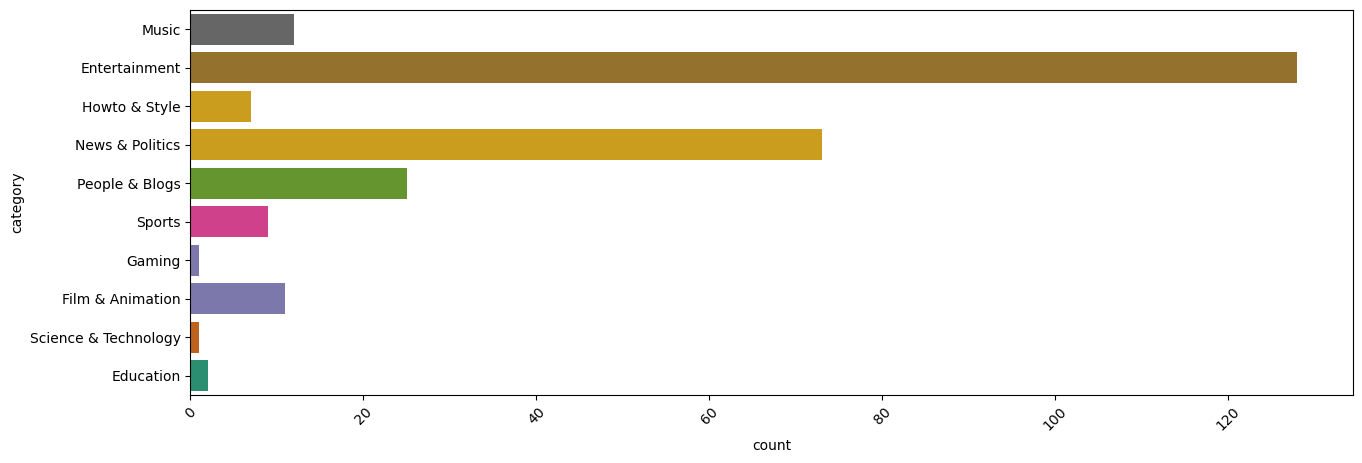

In [79]:
plt.figure(figsize = (15, 5))
plt.xticks(rotation = 45)
sns.countplot(df[df['ratings_disabled'] == 1]['category'], palette = 'Dark2_r')

We see unique publishing months respectively. 

In [80]:
df['publish_month'].unique()

array([11, 10,  2, 12,  9,  3,  5,  4,  1,  8,  7,  6], dtype=int64)

We would have to map the values with the actual month strings so that we understand the data better with the help of visualization. 

In [81]:
month_mapping = {1: 'January', 2: 'February', 3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8:'August',
                 9: 'September', 10: 'October',
                 11: 'November', 12: 'December'}

In [82]:
month_mapping

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

### 3.9 Countplot of Publishing Months

Looking at different publishing months, we see that most of the videos are published in the month of March followed by May and December. There are quite a few videos that are published in the month of August, July and October. 

<Axes: xlabel='count', ylabel='publish_month'>

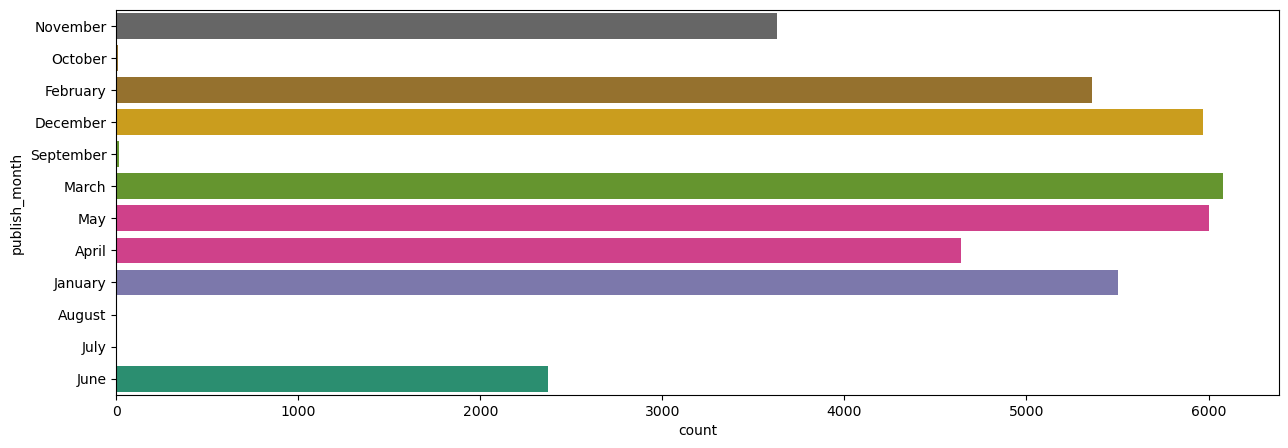

In [83]:
plt.figure(figsize = (15, 5))

sns.countplot(df['publish_month'].map(month_mapping), palette = 'Dark2_r')

We would also add a new features to count the length of the description respectively to understand it better. 

In [84]:
df['description_length'] = df['description'].apply(lambda x: len(x))

### 5.4 Scatterplot of Views and Description Length

As the description length increases, there is a decrease in the number of views. Therefore, if you are willing to publish a video, it would be better if you could describe the video in a short and concise manner so that the viewer could get an idea about the video. 

<Axes: xlabel='views', ylabel='description_length'>

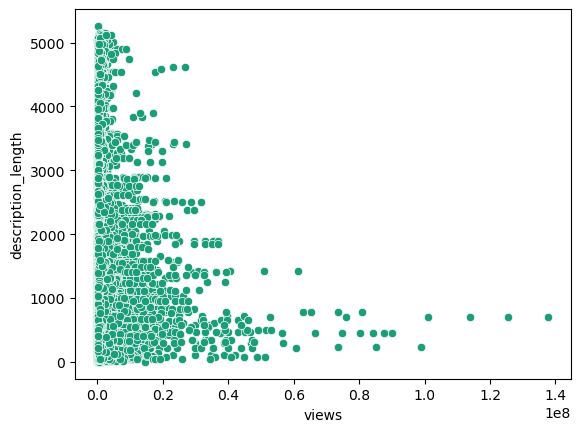

In [85]:
sns.scatterplot(x = 'views', y = 'description_length', data = df)

Creating different correlation columns in our data. 

In [86]:
corr_df = df[['views', 'likes', 'dislikes', 'comment_count', 
              'trending_year', 'trending_day', 'trending_month', 'title_length', 'publish_year', 
              'publish_month', 'publish_day', 'description_length']].corr()

## 6. Heatmap

Heatmaps are quite useful to get colored respresentation of the numerical values. Most of the time, heatmaps are used after performing correlation operation in a dataframe and those values are plotted using heatmaps respectively. Depending on the cmap values considered, higher values of correlation might be intensely colored or vice-versa. We've used a heatmap that plots the correlation values between different features.

### 6.1 Heatmap of Correlation Matrix

We have plotted a heatmap of the correlation matrix so that we understand the relationships between different features in our data respectively. We see that there is a high correlation between likes and views. In addition, there is also a positive relationship between likes and comment_count. Moreover, looks like there are very low correlation values present in our data respectively. 

<Axes: >

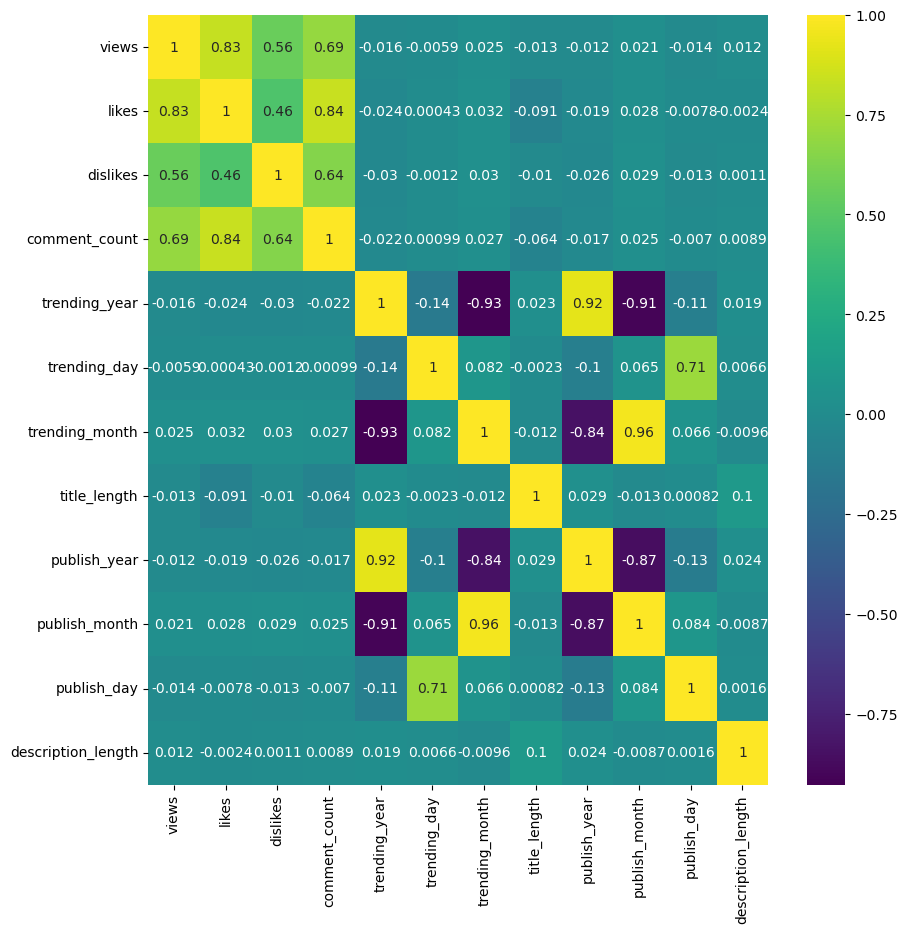

In [87]:
plt.figure(figsize = (10, 10))
sns.heatmap(corr_df, annot = True, cmap = "viridis")

### 5.5 Scatterplot of Likes Vs Comments Count

Let us see based on the heatmap above the relationship between comment count and likes in our data. We see from the below scatterplot that there is a positive relationship between the values. As the comment_count increases, there is a possibility for the likes to increase respectively. But we have to also see that correlation need not always be equal to causation. Therefore, we cannot assume that having a high comment_count would cause the videos to have more likes and vice-versa respectively.

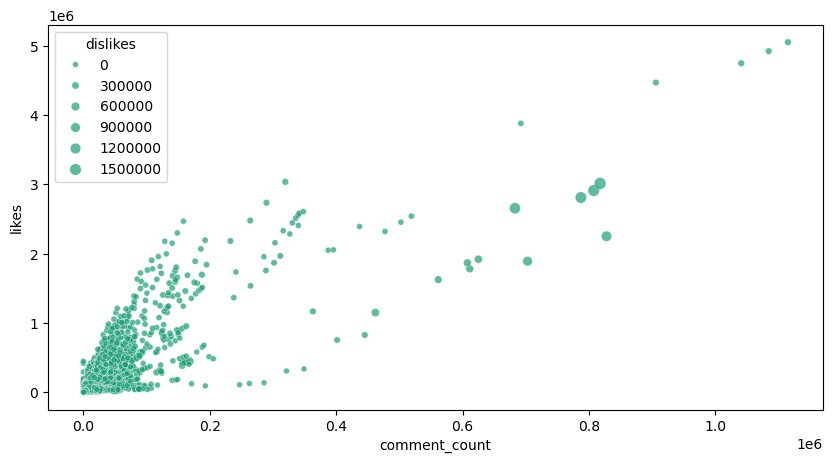

In [88]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'comment_count', y = 'likes', size = df['dislikes'], alpha = 0.7, data = df)
plt.show()

### 5.7 Regplot of Likes Vs Comments Count

We would use a regplot to see a line that is approximation of the trend as can be seen below. 

<Axes: xlabel='comment_count', ylabel='likes'>

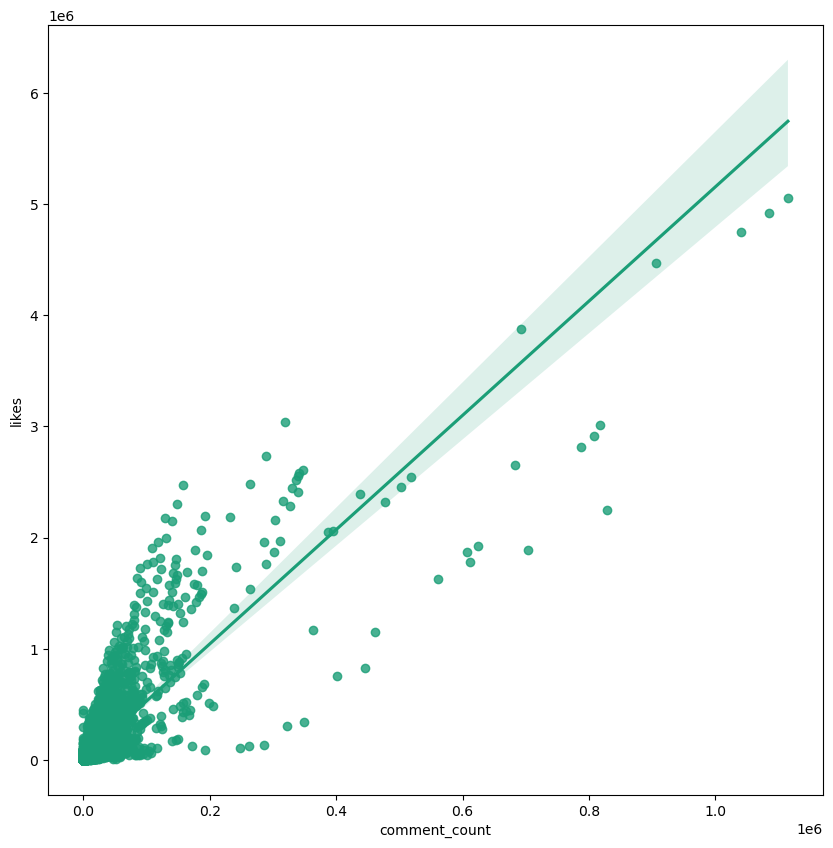

In [89]:
plt.figure(figsize = (10, 10))
sns.regplot(x = 'comment_count', y = 'likes', data = df)

### 5.6 Scatterplot of Likes Vs Dislikes

Looks like there is not a much of a correlation between likes and dislikes as can be seen below.

<Axes: xlabel='likes', ylabel='dislikes'>

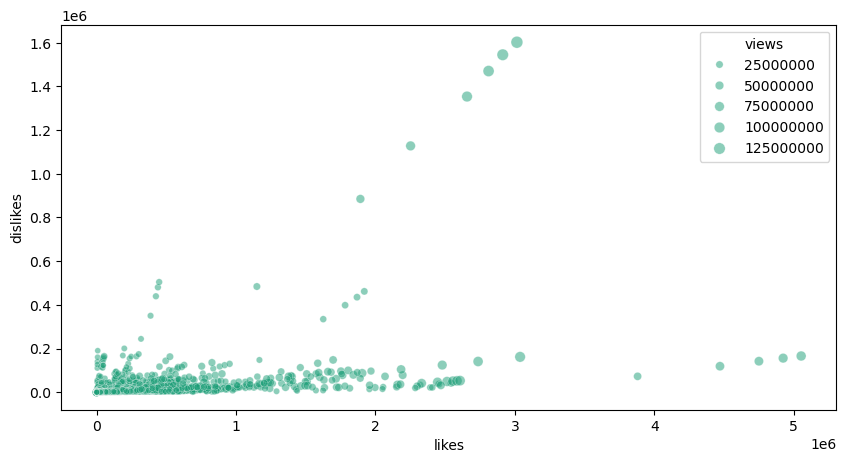

In [90]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'likes', y = 'dislikes', size = df['views'], alpha = 0.5, data = df)

## 7. Conclusion 

1. From the observations, there seems to be a linear relationship between views and the number of likes a video receives based on the scatterplots that we have generated.
2. We have a lot of videos for the entertainment category compared to the other category of videos.
3. We see that the comments were disabled mostly for the Entertainment category type of videos followed by News & Politics.
4. Title length and Description length also matter when we are considering the number of views and likes that a video has from the data we are using. We see that as the title length and the description length increases, there is a lesser possibility of those videos to be famous and have more likes respectively. 